#<center><font color = "green"> TWITTER SENTIMENT ANALYZER </font></center>

<center>
  <img src="https://cdn270.picsart.com/4bfd63fc-41bb-48a3-a5e7-08074a542160/433348990036201.gif" style="width: 300px; height: 300px;" alt="Image">
</center>


### Table Content :

1. [Importing Libraries](#import)
2. [Exploring Through Data](#explore)
3. [Data Cleaning](#clean)

# 1.) <font color = "black">Importing Libraries</font><a class = "anchor" id = "import"></a>

In [1]:
import pandas as pd
import re
import numpy as np
pd.set_option('display.max_colwidth', None)

In [2]:
train_data = pd.read_csv(r"C:\Users\CHAITANYA\Documents\SENTIMENTAL_ANALYSIS_NLP_PROJECT\Train__Data.csv")
test_data =  pd.read_csv(r"C:\Users\CHAITANYA\Documents\SENTIMENTAL_ANALYSIS_NLP_PROJECT\Test_Data.csv")

In [3]:
train_data.head(15)

,textID,text,selected_text,sentiment
0,cb774db0d1,Just published a new blog post on AI technology awsm: Check it out at http://www.exampleblog.com/ai-blog. #AI #TechBlog,new blog technology,neutral
1,549e992a42,Excited to share my latest recipe creation: Try it out here at http://www.cookingdelights.com/recipes. #Cooking #Foodie,excited latest recipe,positive
2,3b9a1f0c2e,The bird flies high in the sky. #nature #peace,flies high in the sky,neutral
3,8d7c5e4f6a,What a thrilling cricket match today! Nail-biting finish with a last-ball six! ???? #CricketFans,thrilling Nail-biting finish last ball,positive
4,088c60f138,"""Late-night studies can be tough, but it`s kwl and all worth it in the end! #LateNightStudies #HardWorkPaysOff""",can be tough,negative
5,9642c003ef,"""Loving the #FridayFeeling! Can`t wait to have some fun this weekend.",loving the fridayfeeling,positive
6,358bd9e861,Had a great time with friends last night. Feeling awsm today! #Friends #GoodTimes,great time awsm,positive
7,28b57f3990,That was a looooong day at work! Time to relax and watch a movie. #ChillTime,time to relax,neutral
8,6e0c6d75b1,I`m so tired of this weather. Can`t wait for summer to come! #ReadyForSunshine,Tired of the weather.,negative
9,50e14c0bb8,Working on my #NewYearResolution to get fit and healthy. #FitnessGoals #HealthyLiving,resolution for fitness and health.,neutral


In [4]:
test_data.head()

,textId,text,selected_text,sentiment
0,4234ca4536,Lookin` at spreadsheets so long my eyes are crossing...,my eyes are crossing...,negative
1,181bc1ee99,no way - those are great words. Boys don`t get to own them. Oh and was it your bday?,no way - those are great words.,neutral
2,ee60f31d77,/drool. I still need to 100% the first one,/drool. I still need to 100% the first one,neutral
3,9457c9ad0f,Word. Yayy twitter after dark lol.,. Yayy,positive
4,54f64bce62,"So, #primavera is in Barcelona. In Spain. Surely Ruth Lorenzo must be here, right? BTW Jarvis has a walking stick","So, #primavera is in Barcelona. In Spain. Surely Ruth Lorenzo must be here, right? BTW Jarvis has a walking stick",neutral


# 2.)  <font color = "black">Exploring Through Data</font><a class = "anchor" id = "explore"></a>

In [5]:
train_data.shape

(10039, 4)

In [6]:
test_data.shape

(2001, 4)

In [7]:
train_data.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [8]:
#no of attributes present in sentiment column 
sentiment_counts =train_data['sentiment'].value_counts()

sentiment_counts

neutral     4043
positive    3192
negative    2804
Name: sentiment, dtype: int64

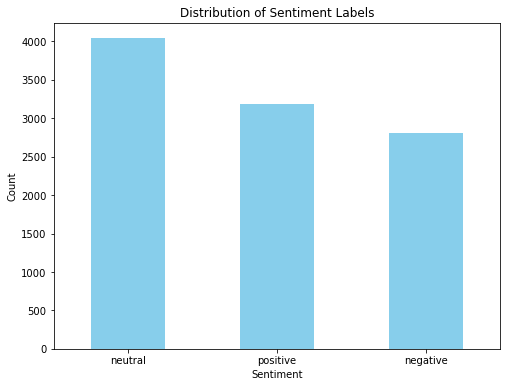

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=0)  
plt.show()

In [10]:
train_data["Length"] = train_data["text"].str.len() # length of tweet

train_data["Words"] = train_data["text"].str.split().str.len() # no of words

In [11]:
display(train_data[["Length" , "Words"]])

,Length,Words
0,120.0,17.0
1,119.0,15.0
2,46.0,9.0
3,96.0,14.0
4,112.0,17.0
...,...,...
10034,10.0,3.0
10035,34.0,6.0
10036,10.0,2.0
10037,50.0,10.0


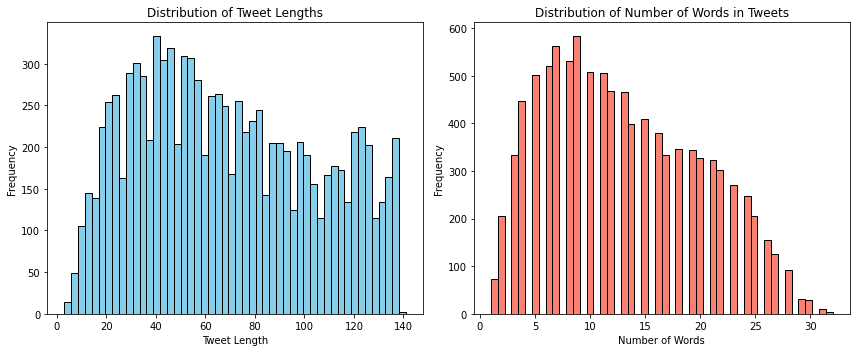

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # two subplots arranged in a 1x2 grid
axes[0].hist(train_data["Length"], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Tweet Length')
axes[0].set_ylabel('Frequency') # no of tweets 
axes[0].set_title('Distribution of Tweet Lengths')
axes[1].hist(train_data["Words"], bins=50, color='salmon', edgecolor='black')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Number of Words in Tweets')
# Adjust layout
plt.tight_layout() # gives sufficient size
plt.show()


In [13]:
# most tweets are of tweet length = 40 in tweets 
# most tweets are of words size = 7,9 in tweets 

In [14]:
train_null_values=train_data['text'].isnull().sum()
train_null_values

1

In [15]:
test_null_values=test_data['text'].isnull().sum()
test_null_values

0

# 3.) <font color = "black">Data Cleaning</font><a class = "anchor" id = "clean"></a>

In [16]:
train_rows_contains_na=train_data[train_data['text'].isnull()]

print(train_rows_contains_na)

         textID text selected_text sentiment  Length  Words
354  fdb77c3752  NaN           NaN   neutral     NaN    NaN


In [17]:
train_data.dropna(subset=['text'], inplace=True)

In [18]:
train_null_values=train_data['text'].isnull().sum()
train_rows_contains_na=train_data[train_data['text'].isnull()]

print(train_rows_contains_na)

Empty DataFrame
Columns: [textID, text, selected_text, sentiment, Length, Words]
Index: []


In [19]:
def rename_column(dataset):
    dataset.rename(columns = { 'text' : 'tweet' } , inplace = True)
    return dataset

rename_column(train_data)
rename_column(test_data)
train_data.head()

,textID,tweet,selected_text,sentiment,Length,Words
0,cb774db0d1,Just published a new blog post on AI technology awsm: Check it out at http://www.exampleblog.com/ai-blog. #AI #TechBlog,new blog technology,neutral,120.0,17.0
1,549e992a42,Excited to share my latest recipe creation: Try it out here at http://www.cookingdelights.com/recipes. #Cooking #Foodie,excited latest recipe,positive,119.0,15.0
2,3b9a1f0c2e,The bird flies high in the sky. #nature #peace,flies high in the sky,neutral,46.0,9.0
3,8d7c5e4f6a,What a thrilling cricket match today! Nail-biting finish with a last-ball six! ???? #CricketFans,thrilling Nail-biting finish last ball,positive,96.0,14.0
4,088c60f138,"""Late-night studies can be tough, but it`s kwl and all worth it in the end! #LateNightStudies #HardWorkPaysOff""",can be tough,negative,112.0,17.0


In [20]:
encodingSentiment = {"positive" : 1 , "negative" : -1 , "neutral" : 0}

In [21]:
def encoding_sentiments(dataset):
    dataset.replace(encodingSentiment, inplace = True)
    return dataset

In [22]:
encoding_sentiments(test_data)
encoding_sentiments(train_data)

,textID,tweet,selected_text,sentiment,Length,Words
0,cb774db0d1,Just published a new blog post on AI technology awsm: Check it out at http://www.exampleblog.com/ai-blog. #AI #TechBlog,new blog technology,0,120.0,17.0
1,549e992a42,Excited to share my latest recipe creation: Try it out here at http://www.cookingdelights.com/recipes. #Cooking #Foodie,excited latest recipe,1,119.0,15.0
2,3b9a1f0c2e,The bird flies high in the sky. #nature #peace,flies high in the sky,0,46.0,9.0
3,8d7c5e4f6a,What a thrilling cricket match today! Nail-biting finish with a last-ball six! ???? #CricketFans,thrilling Nail-biting finish last ball,1,96.0,14.0
4,088c60f138,"""Late-night studies can be tough, but it`s kwl and all worth it in the end! #LateNightStudies #HardWorkPaysOff""",can be tough,-1,112.0,17.0
...,...,...,...,...,...,...
10034,dae1f9f100,im 16 too,im 16 too,0,10.0,3.0
10035,9e6bab2198,Just got bullied by Dillah. HELP!,bullied,-1,34.0,6.0
10036,29ffa4dfad,what lol?,what lol?,0,10.0,2.0
10037,4eb36fc6ac,Some days you must look hard for that good thing.,you must look hard for that good thing.,1,50.0,10.0


In [23]:
train_data.head()

,textID,tweet,selected_text,sentiment,Length,Words
0,cb774db0d1,Just published a new blog post on AI technology awsm: Check it out at http://www.exampleblog.com/ai-blog. #AI #TechBlog,new blog technology,0,120.0,17.0
1,549e992a42,Excited to share my latest recipe creation: Try it out here at http://www.cookingdelights.com/recipes. #Cooking #Foodie,excited latest recipe,1,119.0,15.0
2,3b9a1f0c2e,The bird flies high in the sky. #nature #peace,flies high in the sky,0,46.0,9.0
3,8d7c5e4f6a,What a thrilling cricket match today! Nail-biting finish with a last-ball six! ???? #CricketFans,thrilling Nail-biting finish last ball,1,96.0,14.0
4,088c60f138,"""Late-night studies can be tough, but it`s kwl and all worth it in the end! #LateNightStudies #HardWorkPaysOff""",can be tough,-1,112.0,17.0


In [24]:
test_data.head()

,textId,tweet,selected_text,sentiment
0,4234ca4536,Lookin` at spreadsheets so long my eyes are crossing...,my eyes are crossing...,-1
1,181bc1ee99,no way - those are great words. Boys don`t get to own them. Oh and was it your bday?,no way - those are great words.,0
2,ee60f31d77,/drool. I still need to 100% the first one,/drool. I still need to 100% the first one,0
3,9457c9ad0f,Word. Yayy twitter after dark lol.,. Yayy,1
4,54f64bce62,"So, #primavera is in Barcelona. In Spain. Surely Ruth Lorenzo must be here, right? BTW Jarvis has a walking stick","So, #primavera is in Barcelona. In Spain. Surely Ruth Lorenzo must be here, right? BTW Jarvis has a walking stick",0


In [25]:
col_drop = ['Length' , 'Words' ,'textID' , 'selected_text' ]
colu_drop = ['textId' , 'selected_text' ]


test_data=test_data.drop(columns = colu_drop)
train_data=train_data.drop(columns = col_drop)

In [26]:
train_data.head()

,tweet,sentiment
0,Just published a new blog post on AI technology awsm: Check it out at http://www.exampleblog.com/ai-blog. #AI #TechBlog,0
1,Excited to share my latest recipe creation: Try it out here at http://www.cookingdelights.com/recipes. #Cooking #Foodie,1
2,The bird flies high in the sky. #nature #peace,0
3,What a thrilling cricket match today! Nail-biting finish with a last-ball six! ???? #CricketFans,1
4,"""Late-night studies can be tough, but it`s kwl and all worth it in the end! #LateNightStudies #HardWorkPaysOff""",-1


In [27]:
test_data.head()

,tweet,sentiment
0,Lookin` at spreadsheets so long my eyes are crossing...,-1
1,no way - those are great words. Boys don`t get to own them. Oh and was it your bday?,0
2,/drool. I still need to 100% the first one,0
3,Word. Yayy twitter after dark lol.,1
4,"So, #primavera is in Barcelona. In Spain. Surely Ruth Lorenzo must be here, right? BTW Jarvis has a walking stick",0


### NLP Techniques :

1.) [Lower Casing](#lower)<br>
2.) [Removing Duplicates](#duplicate)<br>
3.) [Removing Noisy data using Regex](#Re)<br>
4.) [Removing Repeated Characters](#removing-rep)<br>
5.) [Expanding Abbrevations](#Expanding_Abbrevations)<br>
6.) [Tokentization](#tokenize)<br>
7.) [Text Normalization](#normalize)<br>
8.) [Stopwords Removal](#stopwords)<br>
9.) [Stemming](#Stemming)<br>
10.) [Lemmatization](#lemmatize)

#  1.) <font color = "black">Lower Casing</font><a class = "anchor" id = "lower"></a>

In [28]:
def lower(text):
    if isinstance(text, str):
        result = ""
        for char in text:
            if 'A' <= char <= 'Z':
                result += chr(ord(char) + 32)  
            else:
                result += char
        return result
    else:
        return text


In [29]:
train_data['tweet'] = train_data['tweet'].apply(lower)
test_data['tweet']=test_data['tweet'].apply(lower)
display(train_data[['tweet']].iloc[:15])

,tweet
0,just published a new blog post on ai technology awsm: check it out at http://www.exampleblog.com/ai-blog. #ai #techblog
1,excited to share my latest recipe creation: try it out here at http://www.cookingdelights.com/recipes. #cooking #foodie
2,the bird flies high in the sky. #nature #peace
3,what a thrilling cricket match today! nail-biting finish with a last-ball six! ???? #cricketfans
4,"""late-night studies can be tough, but it`s kwl and all worth it in the end! #latenightstudies #hardworkpaysoff"""
5,"""loving the #fridayfeeling! can`t wait to have some fun this weekend."
6,had a great time with friends last night. feeling awsm today! #friends #goodtimes
7,that was a looooong day at work! time to relax and watch a movie. #chilltime
8,i`m so tired of this weather. can`t wait for summer to come! #readyforsunshine
9,working on my #newyearresolution to get fit and healthy. #fitnessgoals #healthyliving


# 2.) <font color = "black">Removing Duplicates</font><a class = "anchor" id = "duplicate"></a>

In [30]:
# keep = false : if a tweet is duplicate then it's 1st occurence also considered as duplicate

duplicates1 = train_data[train_data['tweet'].duplicated(keep=False)]
duplicates2 = test_data[test_data['tweet'].duplicated(keep=False)]

In [31]:
print("Duplicated Sentences:")
display(duplicates1)

Duplicated Sentences:


,tweet,sentiment
2,the bird flies high in the sky. #nature #peace,0
12,"i`m having a fantastic day at the beach. the sun is shining, and the water is crystal clear! ? #beachday",1
14,the bird flies high in the sky. #nature #peace,0
37,"i`m having a fantastic day at the beach. the sun is shining, and the water is crystal clear! ? #beachday",0
135,happy mothers day to all you mums out there,1
210,good morning,1
1179,happy mothers day!,1
1427,thanks,1
1683,thank you.,1
1828,good morning,1


In [32]:
# Removing duplicates

# keep='first' => retains 1st occurence of duplicate value and remaining(subsequent) duplicates are dropped

train_data.drop_duplicates(subset='tweet', keep='first', inplace=True)
display(train_data[['tweet']])

,tweet
0,just published a new blog post on ai technology awsm: check it out at http://www.exampleblog.com/ai-blog. #ai #techblog
1,excited to share my latest recipe creation: try it out here at http://www.cookingdelights.com/recipes. #cooking #foodie
2,the bird flies high in the sky. #nature #peace
3,what a thrilling cricket match today! nail-biting finish with a last-ball six! ???? #cricketfans
4,"""late-night studies can be tough, but it`s kwl and all worth it in the end! #latenightstudies #hardworkpaysoff"""
...,...
10034,im 16 too
10035,just got bullied by dillah. help!
10036,what lol?
10037,some days you must look hard for that good thing.


In [33]:
duplicates = train_data[train_data['tweet'].duplicated(keep=False)]

print("Duplicated Sentences:")
print(duplicates)

Duplicated Sentences:
Empty DataFrame
Columns: [tweet, sentiment]
Index: []


In [34]:
# Seperating features and labels

def separate_feature_labels(dataset):
  features =   dataset["tweet"].to_numpy()
  labels   =   dataset["sentiment"].to_numpy()
  return (features, labels)

In [35]:
(train_features, train_labels) = separate_feature_labels(train_data)
(test_features, test_labels) = separate_feature_labels(test_data)

In [36]:
train_features

array(['just published a new blog post on ai technology awsm: check it out at http://www.exampleblog.com/ai-blog.  #ai #techblog',
       'excited to share my latest recipe creation: try it out here at http://www.cookingdelights.com/recipes. #cooking #foodie',
       'the bird flies high in the sky. #nature #peace', ...,
       ' what lol?', ' some days you must look hard for that good thing.',
       'i`m so worn out, this week has sped by soo fast. gonna ask mum if we can go to the movies. i`m desperate'],
      dtype=object)

In [37]:
train_labels

array([ 0,  1,  0, ...,  0,  1, -1], dtype=int64)

# 3.) <font color = "black">Removing Noisy Data</font><a class = "anchor" id = "Re"></a>

In [38]:
def TwitterCleaner(sentences):
    cleaned_sentences = []
    for sentence in sentences:
        if isinstance(sentence, str):
            # Remove Twitter-like usernames (words starting with '@') @Preetham
            cleaned_sentence = re.sub(r'@\w+', '', sentence)
            
            # Remove URLs
            cleaned_sentence = re.sub(r'http\S+|www\S+', '', cleaned_sentence)
            
            #Removing Numbers
            cleaned_sentence=re.sub(r'\b\w*\d\w*\b', ' ', cleaned_sentence)
            
            
             # Remove extra whitespace
            cleaned_sentence = ' '.join(cleaned_sentence.split())
            
            # Remove hashtags and replace underscores with spaces
            cleaned_sentence = cleaned_sentence.replace('#', '').replace('_', ' ').replace('<br/>', ' ').replace('/n',' ')
            
            cleaned_sentences.append(cleaned_sentence)
        else:
            cleaned_sentences.append("")
    
    return cleaned_sentences

In [39]:
train_data['cleaned_tweets'] = TwitterCleaner(train_data['tweet'])
test_data['cleaned_tweets'] = TwitterCleaner(test_data['tweet'])

display(train_data[['tweet','cleaned_tweets']])

,tweet,cleaned_tweets
0,just published a new blog post on ai technology awsm: check it out at http://www.exampleblog.com/ai-blog. #ai #techblog,just published a new blog post on ai technology awsm: check it out at ai techblog
1,excited to share my latest recipe creation: try it out here at http://www.cookingdelights.com/recipes. #cooking #foodie,excited to share my latest recipe creation: try it out here at cooking foodie
2,the bird flies high in the sky. #nature #peace,the bird flies high in the sky. nature peace
3,what a thrilling cricket match today! nail-biting finish with a last-ball six! ???? #cricketfans,what a thrilling cricket match today! nail-biting finish with a last-ball six! ???? cricketfans
4,"""late-night studies can be tough, but it`s kwl and all worth it in the end! #latenightstudies #hardworkpaysoff""","""late-night studies can be tough, but it`s kwl and all worth it in the end! latenightstudies hardworkpaysoff"""
...,...,...
10034,im 16 too,im too
10035,just got bullied by dillah. help!,just got bullied by dillah. help!
10036,what lol?,what lol?
10037,some days you must look hard for that good thing.,some days you must look hard for that good thing.


# 4.) <font color = "black">Removing Repeated Characters</font><a class = "anchor" id = "removing-rep"></a>

In [40]:
def RemovingRepeatedChars(tokens):
    if tokens is not None:
        reg = re.compile(r'(.)\1+')
        newToken = reg.sub(r'\1\1', tokens)
        return newToken

In [41]:
train_data['cleaned_tweets'] = train_data['cleaned_tweets'].apply(RemovingRepeatedChars)
test_data['cleaned_tweets'] = test_data['cleaned_tweets'].apply(RemovingRepeatedChars)
display(train_data[['cleaned_tweets']].iloc[:15])

,cleaned_tweets
0,just published a new blog post on ai technology awsm: check it out at ai techblog
1,excited to share my latest recipe creation: try it out here at cooking foodie
2,the bird flies high in the sky. nature peace
3,what a thrilling cricket match today! nail-biting finish with a last-ball six! ?? cricketfans
4,"""late-night studies can be tough, but it`s kwl and all worth it in the end! latenightstudies hardworkpaysoff"""
5,"""loving the fridayfeeling! can`t wait to have some fun this weekend."
6,had a great time with friends last night. feeling awsm today! friends goodtimes
7,that was a loong day at work! time to relax and watch a movie. chilltime
8,i`m so tired of this weather. can`t wait for summer to come! readyforsunshine
9,working on my newyearresolution to get fit and healthy. fitnessgoals healthyliving


# 5.)  Expanding Abbrevations

In [42]:
abbreviation_dict = {
    'awsm': 'awesome',
    'abt': 'about',
    'abt2': 'about to',
    'frm': 'from',
    'dnd':'do not disturb',
    'dob': 'date of birth',
    'aka': 'also known as',
    'amazn': 'amazing',
    'asap': 'as soon as possible',
    'awks': 'awkward',
    'azm': 'awesome',
    'bcz': 'because',
    'cyb': 'call you back',
    'dis': 'this',
    'enuf': 'enough',
    'faq': 'frequently asked questions',
    'gud': 'good',
    'hbbd': 'happy belated birthday',
    'hbd': 'happy birthday',
    'hf': 'have fun',
    'hru': 'how are you',
    'idc': "i don`t care",
    'idk': "i don`t know",
    "kwl": "cool",
    'lemeno': 'let me know',
    'laf': 'laugh',
    'nah': 'no',
    'nvr': 'never',
    'np': 'no problem',
    'nxt': 'next',
    'pls': 'please',
    'ofc': 'of course',
    'obv': 'obviously',
    'pic': 'picture',
    'pwd': 'password',
    'rip': 'rest in peace',
    's2u': 'same to you',
    'sec': 'second',
    'sry': 'sorry',
    'tlk': 'talk',
    'tq': 'thank you',
    'ttyl': 'talk to you later',
    'tyt': 'take your time',
    'tym': 'thank you much',
    'w/b': 'welcome back',
    'waa': 'crying',
    'wlcm': 'welcome',
    'wtg': 'way to go',
    'wup': "what`s up?",
    'ya': 'yes',
    'yeap': 'yes',
    'yep': 'yes',
    'yrs': 'years',
    'yr': 'year',
    'yup': 'yes',
    'zzz': 'sleeping'
}

In [43]:
# Replace tokens in the 'tokenized_tweet' column using the dictionary
train_data['abbr_checked_tweet'] = train_data['cleaned_tweets'].replace(abbreviation_dict, regex=True)
test_data['abbr_checked_tweet'] = test_data['cleaned_tweets'].replace(abbreviation_dict, regex=True)
display(train_data[[ 'cleaned_tweets' , 'abbr_checked_tweet']].iloc[:15])

,cleaned_tweets,abbr_checked_tweet
0,just published a new blog post on ai technology awsm: check it out at ai techblog,just published a new blog post on ai technology awesome: check it out at ai techblog
1,excited to share my latest recipe creation: try it out here at cooking foodie,excited to share my latest recipe creation: try it out here at cooking foodie
2,the bird flies high in the sky. nature peace,the bird flies high in the sky. nature peace
3,what a thrilling cricket match today! nail-biting finish with a last-ball six! ?? cricketfans,what a thrilling cricket match today! nail-biting finish with a last-ball six! ?? cricketfans
4,"""late-night studies can be tough, but it`s kwl and all worth it in the end! latenightstudies hardworkpaysoff""","""late-night studies can be tough, but it`s cool and all worth it in the end! latenightstudies hardworkpaysoff"""
5,"""loving the fridayfeeling! can`t wait to have some fun this weekend.","""loving the fridayfeeling! can`t wait to have some fun this weekend."
6,had a great time with friends last night. feeling awsm today! friends goodtimes,had a great time with friends last night. feeling awesome today! friends goodtimes
7,that was a loong day at work! time to relax and watch a movie. chilltime,that was a loong day at work! time to relax and watch a movie. chilltime
8,i`m so tired of this weather. can`t wait for summer to come! readyforsunshine,i`m so tired of this weather. can`t wait for summer to come! readyforsunshine
9,working on my newyearresolution to get fit and healthy. fitnessgoals healthyliving,working on my newyearresolution to get fit and healthy. fitnessgoals healthyliving


In [44]:
train_data['cleaned_tweets']=train_data['abbr_checked_tweet']
test_data['cleaned_tweets']=test_data['abbr_checked_tweet']

# 5.) <font color = "black">Tokenization</font><a class = "anchor" id = "tokenize"></a>

In [45]:
def split(text, delimiter=' '):
    if isinstance(text, str):
        result = []
        current_word = ''
        for char in text:
            if char == delimiter:
                if current_word:
                    result.append(current_word)
                current_word = ''
            else:
                current_word += char
        if current_word:
            result.append(current_word)
        return result
    else:
        return []

In [46]:
def tokenization(text):

    punctuation = '!"$%&\()*+,-./:;<=>?[\\]^_{|}~'
    if isinstance(text, str):
        for char in punctuation:
            text = text.replace(char, ' ')
        tokens = split(text)

        return tokens

In [47]:
train_data['tokenized_tweet']=train_data['cleaned_tweets'].apply(tokenization)
test_data['tokenized_tweet']=test_data['cleaned_tweets'].apply(tokenization)
display(train_data[['tokenized_tweet']].iloc[:15])

,tokenized_tweet
0,"[just, published, a, new, blog, post, on, ai, technology, awesome, check, it, out, at, ai, techblog]"
1,"[excited, to, share, my, latest, recipe, creation, try, it, out, here, at, cooking, foodie]"
2,"[the, bird, flies, high, in, the, sky, nature, peace]"
3,"[what, a, thrilling, cricket, match, today, nail, biting, finish, with, a, last, ball, six, cricketfans]"
4,"[late, night, studies, can, be, tough, but, it`s, cool, and, all, worth, it, in, the, end, latenightstudies, hardworkpaysoff]"
5,"[loving, the, fridayfeeling, can`t, wait, to, have, some, fun, this, weekend]"
6,"[had, a, great, time, with, friends, last, night, feeling, awesome, today, friends, goodtimes]"
7,"[that, was, a, loong, day, at, work, time, to, relax, and, watch, a, movie, chilltime]"
8,"[i`m, so, tired, of, this, weather, can`t, wait, for, summer, to, come, readyforsunshine]"
9,"[working, on, my, newyearresolution, to, get, fit, and, healthy, fitnessgoals, healthyliving]"


In [48]:

word_counts = {}

for tokenized_list in train_data['tokenized_tweet']:
    for word in tokenized_list:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted word frequencies
for word, count in sorted_word_counts:
    print(f'{word}: {count}')


i: 4865
to: 3839
the: 3369
a: 2433
my: 1981
and: 1939
you: 1808
is: 1476
in: 1455
it: 1447
for: 1371
of: 1142
me: 1089
on: 1046
that: 992
so: 957
have: 919
but: 906
just: 823
i`m: 821
day: 774
with: 773
be: 748
at: 696
not: 676
was: 651
all: 612
good: 599
this: 587
now: 569
out: 566
no: 544
are: 532
up: 526
get: 502
go: 493
like: 484
too: 465
do: 446
going: 443
it`s: 439
your: 428
work: 423
love: 407
today: 396
got: 392
happy: 383
lol: 379
from: 370
u: 365
what: 361
one: 352
time: 346
will: 343
know: 343
back: 341
don`t: 331
some: 323
really: 323
had: 317
see: 316
its: 313
im: 309
about: 308
we: 303
there: 300
am: 297
can: 296
can`t: 286
home: 280
want: 277
well: 277
night: 271
if: 269
as: 263
thanks: 263
much: 258
new: 255
oh: 255
think: 255
how: 252
an: 248
when: 248
here: 244
still: 244
has: 241
miss: 230
off: 229
more: 226
great: 218
hope: 218
they: 218
yes: 218
her: 212
twitter: 211
morning: 209
haha: 204
need: 203
tomorrow: 201
then: 200
fun: 198
feel: 198
sorry: 196
been: 195
la

rf: 2
hendrix: 2
wolf: 2
editors: 2
nod: 2
writers: 2
amazon: 2
soft: 2
relaxin: 2
doggie: 2
hashtag: 2
banging: 2
languages: 2
explain: 2
insomnia: 2
cox: 2
homies: 2
`hey: 2
needing: 2
software: 2
expo: 2
nm: 2
bounce: 2
shizzle: 2
landlord: 2
kid`s: 2
bacon: 2
birth: 2
rsmv: 2
sentence: 2
president: 2
anotha: 2
entering: 2
me`s: 2
brit: 2
tania: 2
organized: 2
beverage: 2
charm: 2
maintenance: 2
judy: 2
novels: 2
scratches: 2
cauz: 2
spreading: 2
hayley: 2
pep: 2
mayb: 2
aches: 2
wavves: 2
peaceped: 2
force: 2
babes: 2
cobra: 2
starship: 2
suggestion: 2
counts: 2
mutual: 2
compatible: 2
vanessa: 2
newborns: 2
jelous: 2
encourage: 2
listenin: 2
laters: 2
itsucks: 2
rehearsing: 2
macarena: 2
delete: 2
teenagers: 2
domestic: 2
maxim: 2
jet: 2
cancel: 2
planes: 2
saddest: 2
comm: 2
warhammer: 2
bin: 2
dallas: 2
explicitly: 2
mornin`: 2
wallpaper: 2
agh: 2
wales: 2
miller: 2
thirty: 2
aching: 2
rugby: 2
we`d: 2
promising: 2
pj: 2
expense: 2
marina: 2
barcelona: 2
relatively: 2
minor: 2
s

tagalog: 1
waray: 1
`real: 1
world`: 1
rising: 1
day': 1
albany: 1
ao`s: 1
hahh: 1
alfred: 1
bristol: 1
melrose: 1
registrar: 1
unfun: 1
wathing: 1
taquito: 1
cinderelliiee: 1
junction: 1
ollies: 1
twitterfon: 1
relapse: 1
christ: 1
albert: 1
omgosh: 1
hattie: 1
hedgehog: 1
hibernation: 1
formal: 1
opps: 1
madness: 1
chef: 1
francisco: 1
chant: 1
'x': 1
sonic: 1
coffiees: 1
pleaz: 1
letdown: 1
chaper: 1
suited: 1
ego: 1
chillin`: 1
pjs: 1
continually: 1
knocking: 1
dunker: 1
raymond: 1
laxative: 1
hometown: 1
ttake: 1
timeomorrow: 1
stitches: 1
rblpnqte: 1
'sheesh: 1
lol': 1
delux: 1
sesh: 1
awh: 1
preston: 1
'her`s: 1
mine': 1
priceless: 1
blessing: 1
opff: 1
aston: 1
actor': 1
dj`s: 1
partypeople: 1
wonderland: 1
needd: 1
foodd: 1
lewishh: 1
gio: 1
you`r: 1
lunches: 1
flats: 1
fridaayy: 1
buttershots: 1
faire: 1
`night: 1
ruxbury`: 1
niece`s: 1
psp: 1
lite: 1
sm: 1
louise: 1
paranoif: 1
pho: 1
converter: 1
converting: 1
lm: 1
explanation: 1
horrors: 1
anchovies: 1
laud: 1
weddin: 1
f

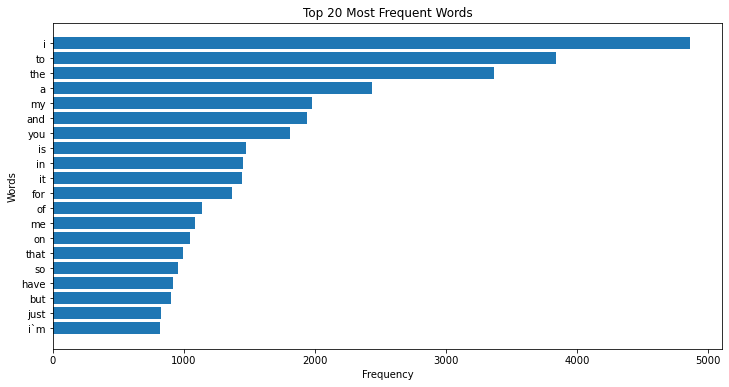

In [49]:
#### import matplotlib.pyplot as plt

top_n = 20
top_words = [word for word, count in sorted_word_counts[:top_n]]
word_frequencies = [count for word, count in sorted_word_counts[:top_n]]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_words, word_frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title(f'Top {top_n} Most Frequent Words')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent words at the top
plt.show()

# 6.) <font color = "black">Text Normalization</font><a class = "anchor" id = "normalize"></a>

In [50]:
# Handling Contractions

appostrophy_dict = {
    "i`d": "i would",
    "i`ll": "I will",
    "i`m": "i am",
    "im": "i am",
    "isn`t": "is not",
    "isnt": "is not",
    "it`s": "it is",
    "it`ll": "it will",
    "i`ve": "i have",
    "can`t": "cannot",
    "cant": "cannot",
    "aren`t": "are not",
    "arent": "are not",
    "haven`t": "have not",
    "havent": "have not",
    "he`d": "he would",
    "he`ll": "he will",
    "he`s": "he is",
    "let`s": "let us",
    "mightn`t": "might not",
    "mightnt": "might not",
    "mustn`t": "must not",
    "mustnt": "must not",
    "shan`t": "shall not",
    "she`d": "she would",
    "she`ll": "she will",
    "she`s": "she is",
    "who`d": "who would",
    "who`ll": "who will",
    "who`re": "who are",
    "who`s": "who is",
    "who`ve": "who have",
    "won`t": "will not",
    "wont": "will not",
    "wouldn`t": "would not",
    "wouldnt": "would not",
    "you`d": "you would",
    "you`ll": "you will",
    "you`re": "you are",
    "you`ve": "you have",
    "wasn`t": "was not",
    "wasnt": "was not",
    "we`ll": "will",
    "shouldn`t": "should not",
    "shouldnt": "should not",
    "couldn`t": "could not",
    "couldnt": "could not",
    "doesn`t": "does not",
    "doesnt": "does not",
    "don`t": "do not",
    "dont": "do not",
    "hadn`t": "had not",
    "hadnt": "had not",
    "hasn`t": "has not",
    "hasnt": "has not",
    "that`s": "that is",
    "thats": "that is",
    "there`s": "there is",
    "they`d": "they would",
    "they`ll": "they will",
    "they`re": "they are",
    "they`ve": "they have",
    "we`d": "we would",
    "we`re": "we are",
    "weren`t": "were not",
    "we`ve": "we have",
    "what`ll": "what will",
    "what`re": "what are",
    "what`s": "what is",
    "whats": "what is",
    "what`ve": "what have",
    "where`s": "where is",
    "didn`t": "did not",
    "didnt": "did not"
}



In [51]:
# Handling Contractions

def removingAppostrophies(tokens):
    if tokens is not None:
        removedText = []
        for token in tokens:
            token_lower = lower(token)
            if token_lower in appostrophy_dict:
                removedText.append(appostrophy_dict[token_lower])
            else:
                removedText.append(token)
        value = " ".join(removedText)
        return value

In [52]:
train_data['normalized_tweet'] = train_data['tokenized_tweet'].apply(removingAppostrophies)
test_data['normalized_tweet'] = test_data['tokenized_tweet'].apply(removingAppostrophies)
display(train_data[['cleaned_tweets','normalized_tweet']].iloc[:15])

,cleaned_tweets,normalized_tweet
0,just published a new blog post on ai technology awesome: check it out at ai techblog,just published a new blog post on ai technology awesome check it out at ai techblog
1,excited to share my latest recipe creation: try it out here at cooking foodie,excited to share my latest recipe creation try it out here at cooking foodie
2,the bird flies high in the sky. nature peace,the bird flies high in the sky nature peace
3,what a thrilling cricket match today! nail-biting finish with a last-ball six! ?? cricketfans,what a thrilling cricket match today nail biting finish with a last ball six cricketfans
4,"""late-night studies can be tough, but it`s cool and all worth it in the end! latenightstudies hardworkpaysoff""",late night studies can be tough but it is cool and all worth it in the end latenightstudies hardworkpaysoff
5,"""loving the fridayfeeling! can`t wait to have some fun this weekend.",loving the fridayfeeling cannot wait to have some fun this weekend
6,had a great time with friends last night. feeling awesome today! friends goodtimes,had a great time with friends last night feeling awesome today friends goodtimes
7,that was a loong day at work! time to relax and watch a movie. chilltime,that was a loong day at work time to relax and watch a movie chilltime
8,i`m so tired of this weather. can`t wait for summer to come! readyforsunshine,i am so tired of this weather cannot wait for summer to come readyforsunshine
9,working on my newyearresolution to get fit and healthy. fitnessgoals healthyliving,working on my newyearresolution to get fit and healthy fitnessgoals healthyliving


# 7.) <font color = "black">StopWords Removal</font><a class = "anchor" id = "stopwords"></a>

In [53]:
stop_words = ['theirs', 'my', 'against', 'a', 
              'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than',
              'ti','ame',' m', 'have' ,'i','say','ames','someti','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 
              'were', 'her', 'more', 'himself', 
              'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to',
              'ours', 'had', 'she', 'all', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 
              'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because',
              'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 
              'herself', 'has', 'just', 'where', 'only', 'myself', 'which', 'those', 
              'after', 'few', 'whom', 't', 'being', 'if','out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 
              'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'is', 's', 'am', 'or', 'who', 
              'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 
              'these', 'your', 'his', 'through', 'don', 'me'
              ]

In [54]:
train_data['normalized_tweet'] = train_data['normalized_tweet'].apply(lambda x: split(x) if isinstance(x, str) else [])
test_data['normalized_tweet'] = test_data['normalized_tweet'].apply(lambda x: split(x) if isinstance(x, str) else [])

In [55]:
train_data['normalized_tweet'] = train_data['normalized_tweet'].apply(lambda tokens: [token for token in tokens if lower(token) not in stop_words])
test_data['normalized_tweet'] = test_data['normalized_tweet'].apply(lambda tokens: [token for token in tokens if lower(token) not in stop_words])

In [56]:
display(train_data[['normalized_tweet']].iloc[:15]) # after stop words

,normalized_tweet
0,"[published, new, blog, post, ai, technology, awesome, check, ai, techblog]"
1,"[excited, share, latest, recipe, creation, try, cooking, foodie]"
2,"[bird, flies, high, sky, nature, peace]"
3,"[thrilling, cricket, match, today, nail, biting, finish, last, ball, six, cricketfans]"
4,"[late, night, studies, tough, cool, worth, end, latenightstudies, hardworkpaysoff]"
5,"[loving, fridayfeeling, cannot, wait, fun, weekend]"
6,"[great, time, friends, last, night, feeling, awesome, today, friends, goodtimes]"
7,"[loong, day, work, time, relax, watch, movie, chilltime]"
8,"[tired, weather, cannot, wait, summer, come, readyforsunshine]"
9,"[working, newyearresolution, get, fit, healthy, fitnessgoals, healthyliving]"


## 8.)  <font color = "black">Stemming and Lemmatization:</font><a class = "anchor" id = "lemmatize"></a>

In [57]:
stemming_dict = {
    'running': 'run',
    'flies': 'fli',
    'cats': 'cat',
    'dogs': 'dog',
    'studies': 'studi',
    'happily': 'happili',
    'going': 'go',
    'exams': 'exam',
    'working': 'work',
    'jumped': 'jump',
    'eating': 'eat',
    'playing': 'play',
    'walked': 'walk',
    'swimming': 'swim',
    'speaking': 'speak',
    'reading': 'read',
    'wrote': 'wrote',
    'singing': 'sing',
    'dancing': 'danc',
    'drinking': 'drink',
    'baking': 'bake',
    'cooking': 'cook',
    'laughing': 'laugh',
    'crying': 'cri',
    'joking': 'joke',
    'sleeping': 'sleep',
    'studying': 'studi',
    'listening': 'listen',
    'traveling': 'travel',
    'swimming': 'swim',
    'speaking': 'speak',
    'writing': 'write',
    'drawing': 'draw',
    'painting': 'paint',
    'building': 'build',
    'flying': 'fli',
    'riding': 'ride',
    'better': 'better',
    'worse': 'wors',
    'brightest': 'brightest',
    'biggest': 'biggest',
    'shortest': 'shortest',
    'longest': 'longest',
    'heaviest': 'heaviest',
    'lightest': 'lightest',
    'happiest': 'happiest',
    'saddest': 'saddest',
    'richest': 'richest',
    'poorest': 'poorest',
    'running': 'run',
    'swims': 'swim',
    'danced': 'danc',
    'faster': 'faster',
    'easiest': 'easiest',
    'happily': 'happili',
    'happier': 'happier',
    'easier': 'easier',
    'cooked': 'cook',
    'baked': 'bake',
    'studied': 'studi',
    'listened': 'listen',
    'published' : 'publish',
    'technology' : 'technolog',
    'excited' : 'excit',
    'recipe' : 'recip',
    'cooking' : 'cook',
    'foodie' : 'foodi',
    'nature' : 'natur',
    'thrilling' : 'thrill',
    'biting' : 'bite',
    'cricketfans' : 'cricketfan',
    'studies' : 'studi',
    'fridayfeeling' : 'fridayfeel',
    'friends' : 'friend',
    'feeling' : 'feel',
    'awesome' : 'awesom',
    'chilltime' : 'chilltim',
    'readyforsunshine' : 'readyforsunshin',
    'working' : 'work',
    'newyearresolution' : 'newyearresolut',
    'healthy' : 'healthi',
    'fitnessgoals' : 'fitnessgo',
    'healthyliving' : 'healthyliv',
    'finished' : 'finish',
    'reading' : 'read',
    'amazing' : 'amaz',
    'highly' : 'highli',
    'bookrecommendation' : 'bookrecommend',
    'cooking' : 'cook',
    'family' : 'famili',
    'turns' : 'turn',
    'delicious' : 'delici',
    'fantastic' : 'fantast',
    'shining' : 'shine',
    'recover' : 'recov',
    'sorry' : 'sorri',
    'party' : 'parti',
    'happy' : 'happi',
    'belated' : 'belat',
    'birthdaywishes' : 'birthdaywish',
    'really' : 'realli',
    'tired' : 'tire',
    'coffee' : 'coffe',
    'possible' : 'possibl',
    'finally' : 'final',
    'believe' : 'believ',
    'already' : 'alreadi',
    'better' : 'better',
    'expected' : 'expect',
    'going' : 'go',
    'adventure' : 'adventur',
    'awaits' : 'await',
    'traveltime' : 'traveltim',
    'unhappy' : 'unhappi',
    'every' : 'everi',
    'positivevibes' : 'positivevib',
    'beautiful' : 'beauti',
    'nature' : 'natur',
    'naturelover' : 'naturelov',
    'baking' : 'baking',
    'cookies' : 'cooki',
    'yummy' : 'yummi',
    'blessed' : 'bless',
    'wonderful' : 'wonder',
    'gratitude' : 'gratitude',
    'happened' : 'happen',
    'wishing' : 'wish'
    
}

lemmatization_dict = {
    'published': 'publish',
    'loving' : 'love',
    'running': 'run',
    'flies': 'fly',
    'cats': 'cat',
    'dogs': 'dog',
    'studies': 'study',
    'happily': 'happy',
    'going': 'go',
    'exams': 'exam',
    'working': 'work',
    'jumped': 'jump',
    'eating': 'eat',
    'playing': 'play',
    'walked': 'walk',
    'swimming': 'swim',
    'speaking': 'speak',
    'reading': 'read',
    'wrote': 'write',
    'singing': 'sing',
    'dancing': 'dance',
    'drinking': 'drink',
    'baking': 'bake',
    'cooking': 'cook',
    'laughing': 'laugh',
    'crying': 'cry',
    'joking': 'joke',
    'sleeping': 'sleep',
    'studying': 'study',
    'listening': 'listen',
    'traveling': 'travel',
    'speaking': 'speak',
    'writing': 'write',
    'drawing': 'draw',
    'painting': 'paint',
    'building': 'build',
    'flying': 'fly',
    'riding': 'ride',
    'better': 'better',
    'worse': 'bad',
    'brightest': 'bright',
    'biggest': 'big',
    'shortest': 'short',
    'longest': 'long',
    'heaviest': 'heavy',
    'lightest': 'light',
    'happiest': 'happy',
    'saddest': 'sad',
    'richest': 'rich',
    'poorest': 'poor',
    'swims': 'swim',
    'danced': 'dance',
    'faster': 'fast',
    'easiest': 'easy',
    'cooked': 'cook',
    'baked': 'bake',
    'studied': 'study',
    'listened': 'listen',
    'published' : 'publish',
    'technology' : 'technology',
    'excited' : 'excite',
    'recipe' : 'recipe',
    'cooking' : 'cook',
    'foodie' : 'foodie',
    'nature' : 'nature',
    'thrilling' : 'thrill',
    'biting' : 'bite',
    'cricketfans' : 'cricketfan',
    'friends' : 'friend',
    'feeling' : 'feel',
    'awesome' : 'awesome',
    'chilltime' : 'chilltime',
    'readyforsunshine' : 'readyforsunshine',
    'working' : 'work',
    'newyearresolution' : 'newyearresolution',
    'healthy' : 'healthy',
    'fitnessgoals' : 'fitnessgoal',
    'healthyliving' : 'healthylive',
    'finished' : 'finish',
    'reading' : 'read',
    'amazing' : 'amaze',
    'bookrecommendation' : 'bookrecommend',
    'cooking' : 'cook',
    'family' : 'family',
    'turns' : 'turn',
    'delicious' : 'delicious',
    'fantastic' : 'fantastic',
    'shining' : 'shine',
    'recover' : 'recover',
    'sorry' : 'sorry',
    'party' : 'party',
    'happy' : 'happy',
    'belated' : 'belate',
    'birthdaywishes' : 'birthdaywish',
    'really' : 'really',
    'tired' : 'tired',
    'coffee' : 'coffee',
    'possible' : 'possible',
    'finally' : 'final',
    'believe' : 'believe',
    'already' : 'already',
    'better' : 'better',
    'expected' : 'expect',
    'going' : 'go',
    'adventure' : 'adventure',
    'awaits' : 'await',
    'unhappy' : 'unhappy',
    'every' : 'every',
    'positivevibes' : 'positivevibe',
    'beautiful' : 'beautiful',
    'nature' : 'nature',
    'naturelover' : 'naturelover',
    'baking' : 'bake',
    'cookies' : 'cookie',
    'yummy' : 'yummy',
    'fridayfeeling' : ' fridayfeel',
    'blessed' : 'bless',
    'goodtimes':'goodtime',
    'vwonderful' : 'wonderful',
    'gratitude' : 'gratitude',
    'happened' : 'happen',
    'ages' : 'age',
    'wishing' : 'wish'
    
}





import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_tokens(tokens):
    stemmed_tokens = []
    for token in tokens:
        if token in stemming_dict:
            stemmed_tokens.append(stemming_dict[token])
        else:
            stemmed_tokens.append(stemmer.stem(token))
    return stemmed_tokens


def lemmatize_tokens(tokens):
    lemmatized_tokens = []
    for token in tokens:
        if token in lemmatization_dict: 
            lemmatized_tokens.append(lemmatization_dict[token])
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(token))
    return lemmatized_tokens




train_data['stemmed_tweet'] = train_data['normalized_tweet'].apply(stem_tokens)
train_data['stemmed_tweet'] = train_data['stemmed_tweet'].apply(lambda x: ' '.join(x))

train_data['lemmatized_tweet'] = train_data['normalized_tweet'].apply(lemmatize_tokens)
train_data['lemmatized_tweet'] = train_data['lemmatized_tweet'].apply(lambda x: ' '.join(x))


test_data['stemmed_tweet'] = test_data['normalized_tweet'].apply(stem_tokens)
test_data['stemmed_tweet'] = test_data['stemmed_tweet'].apply(lambda x: ' '.join(x))

test_data['lemmatized_tweet'] = test_data['normalized_tweet'].apply(lemmatize_tokens)
test_data['lemmatized_tweet'] = test_data['lemmatized_tweet'].apply(lambda x: ' '.join(x))

# improves feature extraction
# better generalization

In [58]:
display(train_data[['tweet','tokenized_tweet','normalized_tweet','stemmed_tweet','lemmatized_tweet']].iloc[:15])

,tweet,tokenized_tweet,normalized_tweet,stemmed_tweet,lemmatized_tweet
0,just published a new blog post on ai technology awsm: check it out at http://www.exampleblog.com/ai-blog. #ai #techblog,"[just, published, a, new, blog, post, on, ai, technology, awesome, check, it, out, at, ai, techblog]","[published, new, blog, post, ai, technology, awesome, check, ai, techblog]",publish new blog post ai technolog awesom check ai techblog,publish new blog post ai technology awesome check ai techblog
1,excited to share my latest recipe creation: try it out here at http://www.cookingdelights.com/recipes. #cooking #foodie,"[excited, to, share, my, latest, recipe, creation, try, it, out, here, at, cooking, foodie]","[excited, share, latest, recipe, creation, try, cooking, foodie]",excit share latest recip creation tri cook foodi,excite share latest recipe creation try cook foodie
2,the bird flies high in the sky. #nature #peace,"[the, bird, flies, high, in, the, sky, nature, peace]","[bird, flies, high, sky, nature, peace]",bird fli high sky natur peac,bird fly high sky nature peace
3,what a thrilling cricket match today! nail-biting finish with a last-ball six! ???? #cricketfans,"[what, a, thrilling, cricket, match, today, nail, biting, finish, with, a, last, ball, six, cricketfans]","[thrilling, cricket, match, today, nail, biting, finish, last, ball, six, cricketfans]",thrill cricket match today nail bite finish last ball six cricketfan,thrill cricket match today nail bite finish last ball six cricketfan
4,"""late-night studies can be tough, but it`s kwl and all worth it in the end! #latenightstudies #hardworkpaysoff""","[late, night, studies, can, be, tough, but, it`s, cool, and, all, worth, it, in, the, end, latenightstudies, hardworkpaysoff]","[late, night, studies, tough, cool, worth, end, latenightstudies, hardworkpaysoff]",late night studi tough cool worth end latenightstudi hardworkpaysoff,late night study tough cool worth end latenightstudies hardworkpaysoff
5,"""loving the #fridayfeeling! can`t wait to have some fun this weekend.","[loving, the, fridayfeeling, can`t, wait, to, have, some, fun, this, weekend]","[loving, fridayfeeling, cannot, wait, fun, weekend]",love fridayfeel cannot wait fun weekend,love fridayfeel cannot wait fun weekend
6,had a great time with friends last night. feeling awsm today! #friends #goodtimes,"[had, a, great, time, with, friends, last, night, feeling, awesome, today, friends, goodtimes]","[great, time, friends, last, night, feeling, awesome, today, friends, goodtimes]",great time friend last night feel awesom today friend goodtim,great time friend last night feel awesome today friend goodtime
7,that was a looooong day at work! time to relax and watch a movie. #chilltime,"[that, was, a, loong, day, at, work, time, to, relax, and, watch, a, movie, chilltime]","[loong, day, work, time, relax, watch, movie, chilltime]",loong day work time relax watch movi chilltim,loong day work time relax watch movie chilltime
8,i`m so tired of this weather. can`t wait for summer to come! #readyforsunshine,"[i`m, so, tired, of, this, weather, can`t, wait, for, summer, to, come, readyforsunshine]","[tired, weather, cannot, wait, summer, come, readyforsunshine]",tire weather cannot wait summer come readyforsunshin,tired weather cannot wait summer come readyforsunshine
9,working on my #newyearresolution to get fit and healthy. #fitnessgoals #healthyliving,"[working, on, my, newyearresolution, to, get, fit, and, healthy, fitnessgoals, healthyliving]","[working, newyearresolution, get, fit, healthy, fitnessgoals, healthyliving]",work newyearresolut get fit healthi fitnessgo healthyliv,work newyearresolution get fit healthy fitnessgoal healthylive
